Benefits of pandas
The pandas forms a core component of the Python data analysis corpus. The distinguishing feature of pandas is the suite of data structures that it provides, which is naturally suited to data analysis, primarily the DataFrame and to a lesser extent Series (1-D vectors) and Panel (3D tables).

In other words, pandas and statstools can be described as Python's answer to R, the data analysis and statistical analysis tool that provides both the data structures, such as data-frames and a rich collection of statistical library for data wrangling/analysis.

There are lot of benefits of using pandas:

Data representation: It can easily represent data in a form naturally suited for data analysis via its DataFrame and Series data structures in a concise manner.

Data subsetting and filtering: It provides for easy subsetting and filtering of data, procedures that are a staple of doing data analysis.

Concise and clear code: Its concise and clear API allows the user to focus more on the core goal at hand, rather than have to write a lot of scaffolding code in order to perform routine tasks.

In addition, pandas is built upon the NumPy libraries and hence, inherits many of the performance benefits of this package, especially when it comes to numerical and scientific computing. One oft-touted drawback of using Python is that as a scripting language, its performance relative to languages like Java/C/C++ has been rather slow. However, this is not really the case for pandas.

#### Data structures in pandas
 
There are three main data structures in pandas:

* Series
* DataFrame
* Panel
 
The DataFrame represents the entire spreadsheet, whereas the Series is a single column of the DataFrame. 

A Pandas DataFrame can also be thought of as a dictionary or collection of Series objects.

The data sets are first read into these dataframes and then various operations (e.g. group by, aggregation etc.) can be applied very easily to its columns. Row label indexes and column labels can be specified along with the data. 

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set some pandas options for controlling output

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

## The Pandas DataFrame Object

#### DataFrame
A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

##### Features of DataFrame
- Potentially columns are of different types
- Size – Mutable
- Labeled axes (rows and columns)


pandas.DataFrame(data, index, dtype, copy)

#### Create DataFrame
A pandas DataFrame can be created using various inputs like −

- Lists
- dict
- Series
- Numpy ndarrays
- Another DataFrame

In [ ]:
df = pd.read_csv("ex1.csv")
df

In [ ]:
# Create an Empty dataFrame
df = pd.DataFrame()
print(df)

In [ ]:
# Create a DataFrame from a single list 
data = [2,3,4,5]
df = pd.DataFrame(data)
print (df)


In [ ]:
# list of lists
data = [['Alex',10],['Bob',12],['Clarke',13]]
#df = pd.DataFrame(data)
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

In [ ]:
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print(df)

# NOTE: Observe, the dtype parameter changes the type of Age column to floating point.

In [ ]:
# Create a DataFrame from Dict 

data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
print(df)

# NOTE: Observe the values 0,1,2,3. They are the default index assigned 
#to each using the function range(n).

In [6]:
# Let us create an indexed DataFrame 

data = {'Name':['Harry', 'John', 'Steve', 'Ron'],'Age':[38,34,39,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])

print(df)
print('\n')
print(df.index)

# NOTE: Observe, the index parameter assigns an index to each row. 

        Name  Age
rank1  Harry   38
rank2      3   34
rank3  Steve   39
rank4    Ron   42


Index(['rank1', 'rank2', 'rank3', 'rank4'], dtype='object')


In [4]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.dtypes

Name    object
Age      int64
dtype: object

In [16]:
# Create a DataFrame from List of Dicts
data = [{'x': 1, 'y': 2},{'x': 5, 'y': 10, 'z': 20}]
df = pd.DataFrame(data)
print(df)

# NOTE: Observe, NaN (Not a Number) is appended in missing areas.

   x   y     z
0  1   2   NaN
1  5  10  John


In [18]:
# DataFrame with row indices and column indices
data = [{'x': 1, 'y': 2},{'x': 5, 'y': 10, 'z': 20}]

#With two column indices, values same as dictionary keys
#df1 = pd.DataFrame(data, index=['first', 'second'], columns=['x', 'y'])
#df1 = pd.DataFrame(data, columns=['x', 'y'])
df1 = pd.DataFrame(data, columns=['x', 'z'])
print(df1)


   x     z
0  1   NaN
1  5  20.0


In [25]:
# Create data frame with row index label
dict1 = {'Occupation': ['Chemist', 'data Analyst'], 'Age': [37, 47], 'Edu': ['PhD', 'BE']}
#dict1_df = pd.DataFrame(dict1, index = ['Robin', 'Wiiliam'], columns = ['Occupation', 'Age', 'Edu'])
dict1_df = pd.DataFrame(dict1, columns = ['Occupation', 'Age', 'Edu'],index = ['Robin', 'Wiiliam'])
dict1_df

           Occupation  Age  Edu
Robin         Chemist   37  PhD
Wiiliam  data Analyst   47   BE

In [26]:
type(dict1_df)

pandas.core.frame.DataFrame

In [27]:
dict1_df.shape

(2, 3)

In [28]:
len(df)

2

In [29]:
##Some attributes of Series
# index, values
print(dict1_df.index)

Index(['Robin', 'Wiiliam'], dtype='object')


In [30]:
print(dict1_df.values)

[['Chemist' 37 'PhD']
 ['data Analyst' 47 'BE']]


In [31]:
# Series methods is keys which is an alias for the index attributes
print(dict1_df.keys())

Index(['Occupation', 'Age', 'Edu'], dtype='object')


In [32]:
# name of the columns
dict1_df.columns

Index(['Occupation', 'Age', 'Edu'], dtype='object')

In [33]:
dict1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Robin to Wiiliam
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Occupation  2 non-null      object
 1   Age         2 non-null      int64 
 2   Edu         2 non-null      object
dtypes: int64(1), object(2)
memory usage: 64.0+ bytes


In [ ]:
df.shape, df.index, df.dtypes, df.columns, type(df), df.isnull().sum()

In [34]:
# Create a DataFrame with two series objects and a dictionary
s1 = pd.Series(np.arange(1,6))
s2 = pd.Series(np.arange(6,11))
df = pd.DataFrame({'a':s1, 'b':s2})
df


   a   b
0  1   6
1  2   7
2  3   8
3  4   9
4  5  10

In [35]:
# DataFrame performs automatic alignment of the data for each Series
s3 = pd.Series(np.arange(12,14), index = [2,3])
s3

2    12
3    13
dtype: int64

In [36]:
df = pd.DataFrame({'a':s1, 'b':s2, 'c':s3})
df

   a   b     c
0  1   6   NaN
1  2   7   NaN
2  3   8  12.0
3  4   9  13.0
4  5  10   NaN

In [37]:
df.shape

(5, 3)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       5 non-null      int64  
 1   b       5 non-null      int64  
 2   c       2 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 248.0 bytes


In [39]:
# just one column
df['a']

0    1
1    2
2    3
3    4
4    5
Name: a, dtype: int64

In [43]:
# its is DataFrame, not a series
type(df[['a']])

pandas.core.frame.DataFrame

In [ ]:
# Create a new data frame with integers as the column names
df1 = df.copy()
print(df1)
df1.columns = [0,1,2]
print('\n')
print(df1)

In [ ]:
df1.columns

In [44]:
df.a

0    1
1    2
2    3
3    4
4    5
Name: a, dtype: int64

In [ ]:
# attributes access of the column by name
type(df.a)

In [45]:
# get the location of the column with the value of a
loc = df.columns.get_loc('c')
loc

2

In [46]:
# Column Addition
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4

In [ ]:
df.shape

In [47]:
# Adding a new column to an existing DataFrame object with column label by passing new series

data = [10,20,30,40]
print ("Adding a new column by passing as Series:")
df['three']=pd.Series(data, index = ['a','b','c','d'])
print(df)

Adding a new column by passing as Series:
   one  two  three
a  1.0    1     10
b  2.0    2     20
c  3.0    3     30
d  NaN    4     40


In [48]:
df.shape

(4, 3)

In [62]:
# Column Deletion
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
     'two' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
     'three' : pd.Series([10,20,30], index=['a','b','c'])}

df = pd.DataFrame(d)

In [63]:
print('Original data Frame')
print(df)

Original data Frame
   one  two  three
a    1    1     10
b    2    2     20
c    3    3     30


In [66]:
# using del function
print ("Deleting the first column using DEL function:")
del df['one']
print (df)

Deleting the first column using DEL function:
   two  three
a    1     10
b    2     20
c    3     30


In [ ]:
df.drop('two', axis =1, inplace = True)
df

#### Indexing and Selecting data

The Python and NumPy indexing operators "[ ]" and attribute operator "." provide quick and easy access to Pandas data structures across a wide range of use cases. However, since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits. 

| Indexing |   Description   |
|:---|:---|
|   .loc() | Label Based    |
|   .iloc() | Integer Based    |

#### .loc()
Pandas provide various methods to have purely label based indexing. When slicing, the start bound is also included. Integers are valid labels, but they refer to the label and not the position.

.loc() has multiple access methods like −

A single scalar label
A list of labels
A slice object
A Boolean array
loc takes two single/list/range operator separated by ','. The first one indicates the row and the second one indicates columns.

In [67]:
df = pd.DataFrame(np.random.randn(8, 4),
index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])
print('Given DataFrame')
print(df)

Given DataFrame
          A         B         C         D
a -0.391094 -0.669435  0.103525  0.530801
b -0.287866 -0.389528  0.244499 -0.070859
c  0.800197 -0.980910  0.618801  0.563278
d  1.490347  1.224607 -0.168902  0.579364
e  0.220924 -0.813001 -1.009399  1.168171
f -0.998536 -0.035073  1.135648  0.342254
g -0.165604  1.218268  0.883686 -0.173746
h -1.080260 -1.193499 -0.797638  1.675764


In [68]:
print('\n')
print('select all rows for a specific column, e.g. column A')
print(df.loc[:,'A'])



select all rows for a specific column, e.g. column A
a   -0.391094
b   -0.287866
c    0.800197
d    1.490347
e    0.220924
f   -0.998536
g   -0.165604
h   -1.080260
Name: A, dtype: float64


In [69]:
print('Select all rows for multiple columns, say list')
print(df.loc[:,['A','C']])

Select all rows for multiple columns, say list
          A         C
a -0.391094  0.103525
b -0.287866  0.244499
c  0.800197  0.618801
d  1.490347 -0.168902
e  0.220924 -1.009399
f -0.998536  1.135648
g -0.165604  0.883686
h -1.080260 -0.797638


In [70]:
print('Select few rows for multiple columns, say list[]')
print(df.loc[['a','b','f','h'],['A','C']])

Select few rows for multiple columns, say list[]
          A         C
a -0.391094  0.103525
b -0.287866  0.244499
f -0.998536  1.135648
h -1.080260 -0.797638


In [71]:
# Select range of rows for all columns
print(df.loc['a':'h'])

          A         B         C         D
a -0.391094 -0.669435  0.103525  0.530801
b -0.287866 -0.389528  0.244499 -0.070859
c  0.800197 -0.980910  0.618801  0.563278
d  1.490347  1.224607 -0.168902  0.579364
e  0.220924 -0.813001 -1.009399  1.168171
f -0.998536 -0.035073  1.135648  0.342254
g -0.165604  1.218268  0.883686 -0.173746
h -1.080260 -1.193499 -0.797638  1.675764


In [72]:
# for getting values with a boolean array
#print(df.loc['a'][df.loc['a']>0] )
print(df.loc['a'][df.loc['a']<0] )

A   -0.391094
B   -0.669435
Name: a, dtype: float64


#### .iloc()
Pandas provide various methods in order to get purely integer based indexing. Like python and numpy, these are 0-based indexing.

The various access methods are as follows −

- An Integer
- A list of integers
- A range of values

In [75]:
df

          A         B         C         D
a -0.391094 -0.669435  0.103525  0.530801
b -0.287866 -0.389528  0.244499 -0.070859
c  0.800197 -0.980910  0.618801  0.563278
d  1.490347  1.224607 -0.168902  0.579364
e  0.220924 -0.813001 -1.009399  1.168171
f -0.998536 -0.035073  1.135648  0.342254
g -0.165604  1.218268  0.883686 -0.173746
h -1.080260 -1.193499 -0.797638  1.675764

In [76]:
# select all columns for a specific rows
print("using iloc:")
print(df.iloc[:4])

print("using loc:")
print(df.loc['a':'d'])

using iloc:
          A         B         C         D
a -0.391094 -0.669435  0.103525  0.530801
b -0.287866 -0.389528  0.244499 -0.070859
c  0.800197 -0.980910  0.618801  0.563278
d  1.490347  1.224607 -0.168902  0.579364
using loc:
          A         B         C         D
a -0.391094 -0.669435  0.103525  0.530801
b -0.287866 -0.389528  0.244499 -0.070859
c  0.800197 -0.980910  0.618801  0.563278
d  1.490347  1.224607 -0.168902  0.579364


In [ ]:
df

In [ ]:
# Integer slicing
print(df.iloc[1:5, 2:4])

print(df.loc['b':'e', "C":"D"])



In [ ]:
df

In [ ]:
# Slicing through list of values
print(df.iloc[[1, 3, 5], [1, 3]])
print('\n')

print(df.loc[['b','d','f'],['B','D']])

In [ ]:
df

In [77]:
print(df.iloc[1:3, :])

          A         B         C         D
b -0.287866 -0.389528  0.244499 -0.070859
c  0.800197 -0.980910  0.618801  0.563278


In [78]:
print(df.iloc[:,1:3])

          B         C
a -0.669435  0.103525
b -0.389528  0.244499
c -0.980910  0.618801
d  1.224607 -0.168902
e -0.813001 -1.009399
f -0.035073  1.135648
g  1.218268  0.883686
h -1.193499 -0.797638


#### Row Selection, Addition, and Deletion


In [ ]:
# Slice rows

print(df[2:4])

In [79]:
# Addition of rows
df1 = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])

print(df1)
print('\n')
#df2 = pd.DataFrame([[5, 6], [7, 8]], index = [3,4],columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]],columns = ['a','b'])

print(df2)
print('\n')

   a  b
0  1  2
1  3  4


   a  b
0  5  6
1  7  8




In [83]:
df = df1.append(df2)
#df = df1.append(df2, ignore_index=True)
print (df)

   a  b
0  1  2
1  3  4
0  5  6
1  7  8


/var/folders/tp/nnpgxs3d1rl0dlwj25kwmcn00000gn/T/ipykernel_72329/978292593.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [84]:
df.loc[0]

   a  b
0  1  2
0  5  6

In [86]:
# Deletion of rows
#Use index label to delete or drop rows from a DataFrame. 
#If label is duplicated, 
#then multiple rows will be dropped.

#If you observe, in the above example, 
#the labels are duplicate. Let us drop a label and 
#will see how many rows will get dropped.


df = df.drop(0)

print (df)

   a  b
1  3  4
1  7  8


In [ ]:
df3

In [ ]:
df.drop(0)

In [85]:
df3.drop(0, inplace = True)

NameError: name 'df3' is not defined

In [ ]:
df3

#### Basic Operations


In [87]:
#Create a series with 10 random numbers
s = pd.Series(np.random.randn(10))
print(s)

0    1.475274
1    0.235776
2    1.255806
3   -0.048602
4    0.867132
5   -0.599239
6   -0.785405
7   -0.223330
8   -0.099923
9   -2.649457
dtype: float64


In [88]:
# Axes: Returns the list of the labels of the series.
print ("The axes are:")
print(s.axes)

The axes are:
[RangeIndex(start=0, stop=10, step=1)]


In [89]:
# empty: Returns the Boolean value saying whether the Object is empty or not. 
# True indicates that the object is empty.
print ("Is the Object empty?")
print(s.empty)

Is the Object empty?
False


In [90]:
# Values: Returns the actul data in the series as an array

print ("The actual data series is:")
print(s.values)

The actual data series is:
[ 1.4752738   0.23577596  1.25580596 -0.04860169  0.86713247 -0.59923948
 -0.78540542 -0.22333016 -0.09992304 -2.64945745]


In [ ]:
s

#### Head and Tail 
To view a small sample of a Series or the DataFrame object, use the head() and the tail() methods.

head() returns the first n rows(observe the index values). 
The default number of elements to display is **five**, 
but you may pass a custom number.

tail() returns the last n rows(observe the index values). 
The default number of elements to display is **five**, but you may pass a custom number.

In [ ]:
# head

print(s.head())
# print('\n')

In [ ]:
print ("The first three rows of the data series:")
print(s.head(3))
#print('\n')

In [ ]:
# tail
print(s.tail())


In [ ]:
print ("The last four rows of the data series:")
print(s.tail(4))

In [91]:
# DataFrame 
d = {'Name':pd.Series(['Tom123','James','Ricky','Vin','Steve','Smith','Jack']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

#Create a DataFrame
df = pd.DataFrame(d)
print ("Our data frame is:")
print(df)

Our data frame is:
     Name  Age  Rating
0  Tom123   25    4.23
1   James   26    3.24
2   Ricky   25    3.98
3     Vin   23    2.56
4   Steve   30    3.20
5   Smith   29    4.60
6    Jack   23    3.80


In [ ]:
type(df)

#### T (Transpose)


In [ ]:
print ("The transpose of the data series is:")
print(df.T)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
# dtypes
#Returns the data type of each column.
print(df.dtypes)

In [92]:
df

     Name  Age  Rating
0  Tom123   25    4.23
1   James   26    3.24
2   Ricky   25    3.98
3     Vin   23    2.56
4   Steve   30    3.20
5   Smith   29    4.60
6    Jack   23    3.80

In [ ]:
# shape: Returns a tuple representing the dimensionality of the 
#DataFrame. Tuple (a,b), where a represents the number of rows and b represents the number of 
#columns.

print ("The shape of the object is:")
print(df.shape)

In [93]:
# size: Number of elements in the DataFrame
print ("The total number of elements in the object is:")
print(df.size)

The total number of elements in the object is:
21


#### Descriptive Statistics


In [94]:
df

     Name  Age  Rating
0  Tom123   25    4.23
1   James   26    3.24
2   Ricky   25    3.98
3     Vin   23    2.56
4   Steve   30    3.20
5   Smith   29    4.60
6    Jack   23    3.80

In [97]:
# sum() Returns the sum of the values for the requested axis. By default, axis is index (axis=0).

print(df.sum())

# Each individual column is added individually 
# (Strings are appended).

Name      Tom123JamesRickyVinSteveSmithJack
Age                                     181
Rating                                25.61
dtype: object


In [98]:
print(df['Name'].sum())

Tom123JamesRickyVinSteveSmithJack


In [ ]:
df

In [99]:
df.dtypes

Name       object
Age         int64
Rating    float64
dtype: object

In [103]:
newdf = df.select_dtypes(exclude=object)
#newdf = df.select_dtypes(include=['int64','object'])
newdf

   Age  Rating
0   25    4.23
1   26    3.24
2   25    3.98
3   23    2.56
4   30    3.20
5   29    4.60
6   23    3.80

In [104]:
newdf.sum()   # default axis =0

Age       181.00
Rating     25.61
dtype: float64

In [106]:
# axis = 1
#(newdf.sum(axis = 1))
(df.sum(axis = 1), df.mean(axis = 1))

/var/folders/tp/nnpgxs3d1rl0dlwj25kwmcn00000gn/T/ipykernel_72329/3895895046.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df.sum(axis = 1), df.mean(axis = 1))


(0    29.23
 1    29.24
 2    28.98
 3    25.56
 4    33.20
 5    33.60
 6    26.80
 dtype: float64,
 0    14.615
 1    14.620
 2    14.490
 3    12.780
 4    16.600
 5    16.800
 6    13.400
 dtype: float64)

In [ ]:
df['Age'].sum()

In [107]:
# mean, std and variance

print("mean:")
print(df.mean())   # column wise

mean:
Age       25.857143
Rating     3.658571
dtype: float64


/var/folders/tp/nnpgxs3d1rl0dlwj25kwmcn00000gn/T/ipykernel_72329/12354112.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())   # column wise


In [ ]:
print(df.mean(axis = 1))  # row wise

In [ ]:
print('\n')
print("standard deviation:")
print(df.std())   
print('\n')
print("variance:")
print(df.var())

#### Summarizing Data

**describe:** The describe() function computes a summary of 
statistics pertaining to the DataFrame columns.

In [109]:
df

     Name  Age  Rating
0  Tom123   25    4.23
1   James   26    3.24
2   Ricky   25    3.98
3     Vin   23    2.56
4   Steve   30    3.20
5   Smith   29    4.60
6    Jack   23    3.80

In [113]:
df['Age'].unique()

array([25, 26, 23, 30, 29])

In [117]:
import numpy as np
x = [1,2,3,3,4,5,5,6]
print(np.unique(x))
print(set(x))

[1 2 3 4 5 6]
{1, 2, 3, 4, 5, 6}


In [110]:
df1 = df.describe()
df1

             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000

In [111]:
df.describe(include = ['object'])

          Name
count        7
unique       7
top     Tom123
freq         1

In [112]:
df.describe(include = 'all')

          Name        Age    Rating
count        7   7.000000  7.000000
unique       7        NaN       NaN
top     Tom123        NaN       NaN
freq         1        NaN       NaN
mean       NaN  25.857143  3.658571
std        NaN   2.734262  0.698628
min        NaN  23.000000  2.560000
25%        NaN  24.000000  3.220000
50%        NaN  25.000000  3.800000
75%        NaN  27.500000  4.105000
max        NaN  30.000000  4.600000

#### Row and Column wise function 

Arbitrary functions can be applied along the axes of a DataFrame or Panel using the apply() method, which, like the descriptive statistics methods, takes an optional axis argument. By default, the operation performs column wise, taking each column as an array-like.

In [122]:
df = pd.DataFrame(np.random.randn(5,3),columns=['x1','x2','x3'])
print(df)
print('\n')
print (df.apply(np.mean))

         x1        x2        x3
0  0.798800  0.617003 -1.477563
1 -0.456404  1.789475  0.497291
2  0.910240 -0.598878 -0.609170
3 -0.088844  0.131202  0.604262
4 -0.182668  0.246114  1.264661


x1    0.196225
x2    0.436983
x3    0.055896
dtype: float64


In [123]:
# By passing axis paramter, operations can be performed row wise
print(df.apply(np.mean,axis=1))

0   -0.020587
1    0.610120
2   -0.099269
3    0.215540
4    0.442703
dtype: float64


In [124]:
print(df.apply(lambda x: x.max() - x.min()))

x1    1.366645
x2    2.388353
x3    2.742224
dtype: float64


In [ ]:
df.min()

In [ ]:
x1 = 1.465537 +1.358447
x2 = 1.149640+0.365918
x3 = -0.032565+1.417971

#### Iteration

The behavior of basic iteration over Pandas objects depends on the type. When iterating over a Series, it is regarded as array-like, and basic iteration produces the values. Other data structures, like DataFrame and Panel, follow the dict-like convention of iterating over the keys of the objects.

In short, basic iteration (for i in object) produces −

Series − values

DataFrame − column labels

Panel − item labels

In [ ]:
df

In [ ]:
df.columns

In [ ]:
# Iterating a DataFrame
# Iterating a DataFrame gives column names.

for col in df:
    print(col)
    


In [ ]:
df.index

To iterate over the rows of the DataFrame, we can use the following functions −
for key,value in df.iteritems():
   print key,value
iteritems() − to iterate over the (key,value) pairs

iterrows() − iterate over the rows as (index,series) pairs

itertuples() − iterate over the rows as namedtuples

In [125]:
df

         x1        x2        x3
0  0.798800  0.617003 -1.477563
1 -0.456404  1.789475  0.497291
2  0.910240 -0.598878 -0.609170
3 -0.088844  0.131202  0.604262
4 -0.182668  0.246114  1.264661

In [126]:
for key,value in df.iteritems():
    print ("column name:",key)
    print("values in the column:",value)

column name: x1
values in the column: 0    0.798800
1   -0.456404
2    0.910240
3   -0.088844
4   -0.182668
Name: x1, dtype: float64
column name: x2
values in the column: 0    0.617003
1    1.789475
2   -0.598878
3    0.131202
4    0.246114
Name: x2, dtype: float64
column name: x3
values in the column: 0   -1.477563
1    0.497291
2   -0.609170
3    0.604262
4    1.264661
Name: x3, dtype: float64


/var/folders/tp/nnpgxs3d1rl0dlwj25kwmcn00000gn/T/ipykernel_72329/319875744.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in df.iteritems():


In [127]:
# iterrows()
#iterrows() returns the iterator yielding each index value 
#along with a series containing the data in each row.

for row_index,row in df.iterrows():
   print(row_index,row)

0 x1    0.798800
x2    0.617003
x3   -1.477563
Name: 0, dtype: float64
1 x1   -0.456404
x2    1.789475
x3    0.497291
Name: 1, dtype: float64
2 x1    0.910240
x2   -0.598878
x3   -0.609170
Name: 2, dtype: float64
3 x1   -0.088844
x2    0.131202
x3    0.604262
Name: 3, dtype: float64
4 x1   -0.182668
x2    0.246114
x3    1.264661
Name: 4, dtype: float64


#### itertuples()
**itertuples()** method will return an iterator yielding a 
named tuple for each row in the DataFrame. 
The first element of the tuple will be the row’s corresponding 
index value, while the remaining values are the row values.

In [ ]:
for row in df.itertuples():
    print(row)

#### Sorting
There are two kinds of sorting available in Pandas. They are −

- By label
- By Actual Value

In [ ]:
df=pd.DataFrame(np.random.randn(10,2),index=[1,4,6,2,3,5,9,8,0,7],columns=['x1','x2'])
print(df)


# NOTE: In unsorted_df, the labels and the values are unsorted. 
# Let us see how these can be sorted.

#### By Label
Using the sort_index() method, by passing the axis arguments 
and the order of sorting, DataFrame can be sorted. By default, 
sorting is done on row labels in ascending order.

In [ ]:
sorted_df = df.sort_index()
print(sorted_df)

#### Order of sorting
By passing the Boolean value to ascending parameter, the order of the sorting can be controlled. Let us consider the following example to understand the same.

In [ ]:
sorted_df = df.sort_index(ascending = False)
print(sorted_df)

#### Sort the Columns
By passing the axis argument with a value 0 or 1, the sorting can be done on the column labels. By default, axis=0, sort by row. 

In [ ]:
sorted_df=df.sort_index(axis=1)

print(sorted_df)

#### By Value
Like index sorting, sort_values() is the method for sorting by values. It accepts a 'by' argument which will use the column name of the DataFrame with which the values are to be sorted.

In [ ]:
sorted_df = df.sort_values(by='x2')
print(sorted_df)

# NOTE: Observe, col1 values are sorted and the respective 
#x2 value and row index 
# will alter along with x1. Thus, they look unsorted.

#### Attribute Access
Columns can be selected using the attribute operator '.'.

In [ ]:
print(df)
print('\n')
print(df.x1)  #df['x1']

#### Cleaning and Preparation
Below are the steps involved to understand, clean and prepare the data for data analysis or building the predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation


#### Statistical Functions
Statistical methods help in the understanding and analyzing the behavior of data. we will learn few of them. 

#### Percent_change
Series, DatFrames and Panel, all have the function pct_change(). This function compares every element with its prior element and computes the change percentage.

In [ ]:
x = pd.Series([1,2,3,4,5,4])

print('Given Series:\n', x)
print ('percentage change:\n', x.pct_change())
print('\n')

df = pd.DataFrame(np.random.randn(5, 2))
print('data:\n ',df)
print('\n')
print(df.pct_change())

# NOTE: By default, the pct_change() operates on columns; if 
# you want to apply the same row wise, then use axis=1() argument.


In [ ]:
# Covariance
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
print (s1.cov(s2))
print('\n')
#Covariance method when applied on a DataFrame, 
#computes cov between all the columns.

df = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'])
print (df['a'].cov(df['b']))
print('\n')
print(df.cov())

#### Correlation
Correlation shows the linear relationship between any two array of values (series). There are multiple methods to compute the correlation like pearson(default), spearman and kendall.



In [ ]:
r1 = -0.5, r2 = 0.2

In [131]:
df = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'])
df

          a         b         c         d         e
0  0.468672 -0.631779  0.064395 -2.499980  0.094983
1  0.500393 -1.823417  0.837165 -0.113901  0.330553
2 -0.691656 -0.281338 -1.359187 -0.951010  0.339759
3 -1.423411  0.442372 -1.225154  1.593132  0.787598
4 -1.294485  1.346315  0.768173  0.393980 -0.888567

In [ ]:
print(df['a'].corr(df['b']))

In [132]:
df.corr()

          a         b         c         d         e
a  1.000000 -0.872076  0.430071 -0.723737  0.141560
b -0.872076  1.000000 -0.172472  0.411870 -0.500163
c  0.430071 -0.172472  1.000000 -0.139261 -0.646167
d -0.723737  0.411870 -0.139261  1.000000  0.135241
e  0.141560 -0.500163 -0.646167  0.135241  1.000000

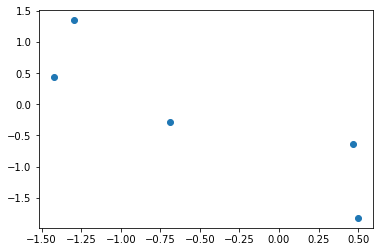

In [134]:
plt.scatter(df['a'],df['b'])

In [135]:
df1 = pd.DataFrame(np.random.randn(50, 2), columns=['a', 'b'])
df1

           a         b
0  -1.512783  0.683334
1  -0.913353  0.352269
2   0.507575  1.484479
3  -0.212916 -0.845998
4  -0.136456  1.684384
..       ...       ...
45  1.697076  0.890997
46  0.662073  0.567862
47  0.167474 -1.114482
48  0.086830 -1.989206
49 -0.855546 -1.463207

[50 rows x 2 columns]

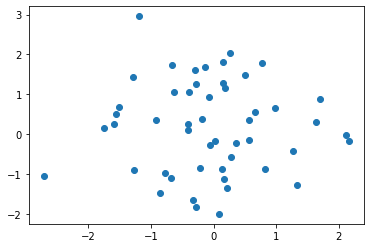

In [137]:
plt.scatter(df1['a'],df1['b'])

In [136]:
print(df1['a'].corr(df1['b']))

-0.018638548027763286


In [138]:
print (df.corr())

          a         b         c         d         e
a  1.000000 -0.872076  0.430071 -0.723737  0.141560
b -0.872076  1.000000 -0.172472  0.411870 -0.500163
c  0.430071 -0.172472  1.000000 -0.139261 -0.646167
d -0.723737  0.411870 -0.139261  1.000000  0.135241
e  0.141560 -0.500163 -0.646167  0.135241  1.000000


#### Missing Data
Missing data is a problem in real life scenarios. Areas like machine learning and data mining face severe issues in the accuracy of their model predictions because of poor quality of data caused by missing values. In these areas, missing value treatment is a major point of focus to make their models more accurate and valid.

In Pandas missing data is represented by two value:

- **None**: None is a Python singleton object that is often used for missing data in Python code.

- **NaN**: NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation

Pandas treat *None* and *NaN* as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame:

- isnull()
- notnull()
- dropna()
- fillna()
- replace()
- interpolate()


#### Handling Missing Values

- Ignore the Missing Value During Analysis:  This is usually done when class label is missing ( assuming the mining task involves classification). This method is not very effective, unless the record contains several attributes with missing values. It is especially poor when the percentage of missing values per attribute varies considerably.


- Fill in the missing value manually: In general, this approach is time consuming and may not be feasible given a large data set with many missing values


- Use a global constant/mean or median to fill in the missing value: Replace all missing feature values by the same constant/mean or median of the attribute


- Use the most probable value to fill in the missing value: This may be determined with regression, inference-based tools using a Bayesian formalism, or decision tree induction. 


**Note** it is as important to avoid adding bias and distortion
to the data as it is to make the information available.
	
	• bias is added when a wrong value is filled-in

No matter what techniques you use to conquer the problem, it
comes at a price. The more guessing you have to do, the further
away from the real data the database becomes. Thus, in turn, it
can affect the accuracy and validation of the mining results. 


Here we will see how we can handle missing values using Pandas

In [ ]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

print(df)

#### Check for missing values

Pandas provides the **isnull** and **notnull()** functions.   

In [ ]:
print(df.isnull())  # notnull()

In [ ]:
df

In [ ]:
# we can do one column also
print(df['one'].isnull())

In [ ]:
# Calculate the total number of missing values in each column

print(df.isnull().sum())

In [ ]:
# Calculate the total number of missing values in each row
print(df.isnull().sum(axis = 1))

#### Calculations with Missing Data

- When summing data, NA will be treated as Zero
- If the data are all NA, then the result will be NA

In [ ]:
# one column
print(df['one'].sum())
print('\n')

# DataFrame
print(df.sum())


#### Drop Missing Values
If you want to simply exclude the missing values, then use the dropna function along with the axis argument. By default, axis=0, i.e., along row, which means that if any value within a row is NA then the whole row is excluded.

In [ ]:
df.shape

In [ ]:
print(df.dropna())

In [ ]:
df

In [ ]:
print(df.dropna(axis = 1))

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 2, 5]])
data

In [ ]:
cleaned = data.dropna()
cleaned

In [ ]:
data

In [ ]:
data.dropna(how='all')

In [ ]:
data

In [ ]:
data[4] = np.nan
data


Passing how='all' will only drop rows that are all NA:

In [ ]:
data.dropna(axis=1, how='all')  # axis = 1 drop columns

Suppose you want to keep only rows containing a certain number of observations. You can indicate this with the thresh argument:

In [ ]:
data.dropna(thresh=2)

In [ ]:
data

In [ ]:
#data.dropna(axis = 1,thresh=2)
data.dropna(thresh=2)

#### Filling Missing data
Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. 

Pandas provides **fillna** function to fill in NA values with non-null data in various ways.


In [ ]:
# Replace NaN with a scalar Value

print ("NaN replaced with '0':")
print(data.fillna(0))

In [ ]:
data

#### Fill NA Foward and Backward

| Method |   ACtion   |
|:---|:---|
|   pad/ffill | Fill methods forward   |
|   bfill/backfill | Fill methods Backward    |


In [ ]:
print(data.fillna(method='pad')) 

In [ ]:
print(data.fillna(method='backfill'))

In [ ]:
df = pd.DataFrame(np.random.randn(7, 3))


In [ ]:
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

# val_replace = df[0].mean()
val_replace
df.fillna(val_replace)

Calling *fillna* with a dict, you can use a different fill value for each column

In [ ]:

df.fillna({'one': 0.5, 'two': 0})

In [ ]:
df.fillna(method='ffill')

In [ ]:
df.fillna(method='ffill', limit=2)

With *fillna* you can do lots of other things with a little creativity. For example, you might pass the mean or median value of a Series:

In [ ]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])


In [ ]:
data.fillna(data.mean())

#### Data Transformation

#### Removing Duplicates

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],'k2': [1, 1, 2, 3, 3, 4, 4]})

In [ ]:
data

The DataFrame method *duplicated* returns a boolean Series indicating whether each row is a duplicate 

In [ ]:
data.duplicated()

Relatedly, *drop_duplicates* returns a DataFrame where the duplicated array is False:

In [ ]:
data.drop_duplicates()

Both of these methods by default consider all of the columns; alternatively, you can specify any subset of them to detect duplicates. Suppose we had an additional column of values and wanted to filter duplicates only based on the 'k1' column:

In [ ]:
data['v1'] = range(7)
data

In [ ]:
data.drop_duplicates(['k1'])

#### Replacing Values

*replace* provides a simpler and more flexible way to do replacement. 

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

The -999 values might be sentinel values for missing data. To replace these with NA values that pandas understands, we can use replace, producing a new Series (unless you pass inplace=True):

In [ ]:
data.replace(-999, np.nan)

If you want to replace multiple values at once, you instead pass a list and then the substitute value:

In [ ]:
data.replace([-999, -1000], np.nan)

In [ ]:
# To use a different replacement for each value, 
# pass a list of substitutes:

data.replace([-999, -1000], [np.nan, 0])

The argument passed can also be a dict:

In [ ]:
data.replace({-999: np.nan, -1000: 0})

#### Discretization and Binning
Continuous data is often discretized or otherwise separated into “bins” for analysis.

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Let’s divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older. To do so, you have to use cut, a function in pandas:

In [ ]:
bins = [18, 25, 35, 60, 100]

In [ ]:
cats = pd.cut(ages,bins)
cats

The object pandas returns is a special Categorical object. The output you see describes the bins computed by pandas.cut. You can treat it like an array of strings indicating the bin name; internally it contains a categories array specifying the dis‐ tinct category names along with a labeling for the ages data in the codes attribute:

In [ ]:
cats.codes

In [ ]:
cats.categories

Consistent with mathematical notation for intervals, a parenthesis means that the side is open, while the square bracket means it is closed (inclusive). You can change which side is closed by passing right=False:

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

In [ ]:
pd.value_counts(cats)

You can also pass your own bin names by passing a list or array to the labels option:

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [ ]:
pd.cut(ages, bins, labels=group_names)

If you pass an integer number of bins to cut instead of explicit bin edges, it will com‐ pute equal-length bins based on the minimum and maximum values in the data. Consider the case of some uniformly distributed data chopped into fourths:

In [ ]:
data = np.random.rand(20)
data

In [ ]:
pd.cut(data, 4, precision=2)

#### Detecting and Filtering Outliers
- Outliers are data objects with characteristics that are considerably different than most of the other data objects in the data set


- Data points inconsistent with the majority of data


- Outlier detection can be used for fraud detection or data cleaning


Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:


- It increases the error variance and reduces the power of statistical tests


- If the outliers are non-randomly distributed, they can decrease normality


- They can bias or influence estimates that may be of substantive interest


- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.


#### How to detect outliers

Most commonly used method to detect outliers is visualization. 

We use various visualization methods, like Box-plot, Histogram, Scatter plot, clustering, curve fitting. 


Some analysts also various thumb rules to detect outliers. Some of them are:

- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR


- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier

- Data points, three or more standard deviation away from mean are considered outlier


- Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding



#### How to remove them 
Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.

Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [ ]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [ ]:
data.describe()

Suppose you wanted to find values in one of the columns exceeding 3 in absolute value:

In [ ]:
col = data[2]
col

In [ ]:
col[np.abs(col)>3]

To select all rows having a value exceeding 3 or –3, you can use the any method on a boolean DataFrame:

In [ ]:
data[(np.abs(data) > 3).any(1)]

Values can be set based on these criteria. Here is code to cap values outside the inter‐ val –3 to 3

In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [ ]:
data.describe()

#### Computing Indicator/Dummy Variables
Another type of transformation for statistical modeling or machine learning applica‐ tions is converting a categorical variable into a “dummy” or “indicator” matrix. If a column in a DataFrame has k distinct values, you would derive a matrix or Data‐ Frame with k columns containing all 1s and 0s. pandas has a get_dummies function for doing this, though devising one yourself is not difficult. Let’s return to an earlier example DataFrame:

In [ ]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})

In [ ]:
df.dtypes

In [ ]:
df

In [ ]:
pd.get_dummies(df)

In [ ]:
pd.get_dummies(df['key'])

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [ ]:
dummies

In [ ]:
df_with_dummy = df[['data1']].join(dummies)


In [ ]:
df_with_dummy

A useful recipe for statistical applications is to combine get_dummies with a discretization function like cut:

In [ ]:
np.random.seed(12345)

In [ ]:
values = np.random.rand(10)
values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [ ]:
pd.get_dummies(pd.cut(values, bins))

#### String Manipulation
Python has long been a popular raw data manipulation language in part due to its ease of use for string and text processing. Most text operations are made simple with the string object’s built-in methods. 


For more complex pattern matching and text manipulations, regular expressions may be needed. pandas adds to the mix by enabling you to apply string and regular expressions concisely on whole arrays of data, additionally handling the annoyance of missing data.

In [ ]:
val = 'a,b,  guido'
val

In [ ]:
val1 = val.split(',')
val1

In [ ]:
type(val1)

split is often combined with strip to trim whitespace (including line breaks):

In [ ]:
str_pieces = [x.strip() for x in val.split(',')]

In [ ]:
str_pieces

These substrings could be concatenated together with a two-colon delimiter using addition:

In [ ]:
first, second, third = str_pieces

In [ ]:
first + '::' + second + '::' + third

But this isn’t a practical generic method. A faster and more Pythonic way is to pass a list or tuple to the join method on the string '::':

Other methods are concerned with locating substrings. Using Python’s in keyword is the best way to detect a substring, though index and find can also be used:

In [ ]:
'::'.join(str_pieces)

In [ ]:
'guido' in val

In [ ]:
val.index(',')

replace will substitute occurrences of one pattern for another. It is commonly used to delete patterns, too, by passing an empty string:

In [ ]:
val.replace(',', '::')

In [ ]:
val.replace(',', '')

| Argument |   Description|
|:---|:---|
|   count | Return the number of non-overlapping occurrences of substring in the string. |
|   endswith |  ReturnsTrueif string ends with suffix. |
|   startswith |  ReturnsTrueif string starts with prefix. |
|   join |  Use string as delimiter for concatenating a sequence of other strings. |
|   index | Return position of first character in substring if found in the string; raises ValueError if not found. |
|   find |  Return position of first character of first occurrence of substring in the string; like index, but returns –1
if not found. |
|   replace|  Replace occurrences of string with another string. |
|  strip|  Trim whitespace, including newlines; equivalent to x.strip() (and rstrip, lstrip, respectively) for each element.|
|   upper|  Convert alphabet characters to uppercase.|
|  lower|  Convert alphabet characters to lowercase.|

# Combining and Reshaping

Once the data is tidied up,it will likely that we will then need to use this data either to combine multiple sets of data, or to reorganize the data. 

Here we will discuss combination and reshaping of data. Combination of data in pandas is performed by concatenating two sets of data, where data is combined simply along either axes but without regard to the relationships in the data. Or data can be combined using relationships in the data by using a pandas capability referred to as merging, which provides join operations that are similar to those in may relational databases. 

We will discuss various reshaping techniques like pivoting, stacking, and unstacking, and melting of data. 

Pivoting allows to restructure data similarly to how spreadsheets pivot data by creating new index levels and moving data into columns based upon values (or vice-versa). 

Stacking and unstacking are similar to pivoting, but allow us to pivot data organized with multiple levels of indexes.

Finally, melting allows to restructure data into unique ID-variable-measurement combinations that are or required for many statistical analyses. Following concepts of combining and reshaping are available and will be discussed.

- Concatenation
- Merging and joining
- Pivots
- Stacking/unstacking
- Melting


#### Concatenating

Concatenating is the process of either adding rows to the end of an Series or DataFrame. The operation is performed via the function *concat*. Again the function will perform the operation on a specific axis. The general syntax is to pass a list of objects to *concat()* function.  

In [ ]:
s1 = pd.Series(np.arange(1,5))
s1

In [ ]:
s2 = pd.Series(np.arange(5,9))
s2

In [ ]:
pd.concat([s1,s2])

In [ ]:
pd.concat([s1,s2], ignore_index = True)

In [ ]:
Two DataFrame objects can also be cocatenated

In [ ]:
df1 = pd.DataFrame(np.arange(9).reshape(3,3), columns = ['x','y','z'])
df1

In [ ]:
df2 = pd.DataFrame(np.arange(9,18).reshape(3,3), columns = ['x','y','z'])
df2

In [ ]:
pd.concat([df1,df2], ignore_index = True)

The process of concatenating the two Dataframe objects will first identify the set of columns formed by aligning the labels in the columns, effectively determining the union of the column names. The resulting DataFrame object will then consists of columns, and columns with identical names will not be duplicated 

Rows will be then be added to the result, in the order of the each of the objects passed to function *concat()*. If a column in the result does not exist in the object being copied, NaN values will be filled in those locations. Duplicate row index labels can occur.


In [ ]:
df1 = pd.DataFrame(np.arange(9).reshape(3,3), columns = ['a','b','c'])
df1

In [ ]:
df2 = pd.DataFrame(np.arange(9,18).reshape(3,3), columns = ['a','c','d'])
df2

In [ ]:
# concat the two objects, but create an index using the given keys

df3 = pd.concat([df1,df2])
df3

*concat()* function allows to specify the axis on which to apply the concatenation. 


In [ ]:
df3 = pd.DataFrame(np.arange(9,18).reshape(3,3), columns = ['x','y','z'])
pd.concat([df1,df3], axis =1)  # column wise

Note the resultant dataframe contains duplicate columns. The concatenation first aligns by the row index labels of each DataFrame and then fills in the columns from the first DataFrame and then then the second. The columns are not aligned and result in duplicate values


The same rules of alignment and filling on NaN values apply in thsi case except that they are applied to the rows index labels. The following example demonstrates a concatenation along the columns axis with two DataFrames that have row index labebsl in common (2 and 3) along with disjoint rows(0 in df1 and 4 in df3). Additionally, some of the columns in df3 overlap with df1(a) as well as being disjoint(d) 

In [ ]:
df3 = pd.DataFrame(np.arange(20,26).reshape(3,2), columns = ['a','d'], index = [2,3,4])
df3

In [ ]:
pd.concat([df1,df3], axis =1)

A concatenation of two or more DataFrame actually performs an outer join along the index labels on the axis opposite to the one specified. This makes the result of the concatenation similar to having performed a union of those index labels, and then data is filled based on the alignment of those labels to the source objects. 


The type of join can be changed to an inner join and can be performed by specifying *join= 'inner'* as the parameter. The inner join then logically performs the interaction instead of a union. 

In [ ]:
pd.concat([df1,df3], axis = 1, join = 'inner') # only 2 is the common row.


It is also possible to use label groups of data along the columns using the *keys* parameter when applying the concatenation along axis = 1


In [ ]:
df=pd.concat([df1,df2], axis = 1, keys = ['df1', 'df2'])

In [ ]:
# Different groups can be accessed using the *.ix* process 

In [ ]:
df.ix[:,'df2']

*append()* method concatenate the two specified DataFrame long the row index labels

In [ ]:
df1.append(df2)

As with a concatenation on axis =1, the index labels in the rows are copied without consideration of the creation of duplicates, and the column labels are joined in a manner which ensures no duplicate column name in included in the result. 

If you would like to ensure that the resulting index does not have duplicates but preserves all of the rows, you can use the *ignore_index = True* parameter. This returns the same result except with new *Int64Index* 

In [ ]:
df1.append(df2,ignore_index = True)

#### Merging and joining data

pandas provides functionality of merging the panadas objects with databas like join operations using the *merge()* function and *merge* metod of a Dataframe objects.

A merge combines the data of two pandas objects by finding matching values in one or more columns or row indexes. It then returns a new object that represents a combination of the data from both based on relational-databases-like join applied to those values


#### Merging/Joining
Pandas has full-featured, high performance joining operations similar to SQL.

Pandas provides a single function, *merge*, as the entry point for all standard database join operations between DataFrame objects


In [ ]:
df1 = pd.DataFrame({ 'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
df2 = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(df1)
print('\n')

print(df2)




In [ ]:
# Merge Two DataFrames on a key
print(pd.merge(df1,df2,on = 'id'))


In [ ]:
# Merge Two DataFrames on Multiple Keys
print(pd.merge(df1,df2,on=['id','subject_id']))

In [ ]:
customers = pd.DataFrame({'CustomerID': [10,11], 'Name':['John', 'Jenny'],'Address':["address of john", 'address of jenny']})
customers

In [ ]:
from datetime import datetime
orders = pd.DataFrame({'CustomerID': [10,11,10], 'Amount': [1000, 2000,5000]})
orders

In [ ]:
# Now we would like to know the amount of the order 
# each customer spent on each order  

customers.merge(orders)

what pandas has done is the following:

1. Determines the columns in both customers and orders with common labels. These columns are treated as the keys to perform the join

2. It creates a new DataFrame whose columns are the labels from the keys identified from the keys identified in step 1. followed by all of the non-key labels from both objects

3. It matches values in the key columns of both DataFrame objects

4. It then creates a row in the result for each set of matching labels

5. It then copies the data from those matching rows from each source object into that respective row and columns of the result

6. it assigns a new Int64Index to the result


The join in a merge can use values from multiple columns. 

In [ ]:
left_data = {'key1':['a','b','c'], 'key2':['x','y','z'], 'lval1':['5','6','7']}
left = pd.DataFrame(left_data,index = [0,1,2])

left

In [ ]:
right_data = {'key1':['a','b','c'], 'key2':['x','a','z'], 'lval1':['1','2','3']}

right = pd.DataFrame(right_data, index = [1,2,3])
right

In [ ]:
left.merge(right, on = 'key1')

In [ ]:
left.merge(right, on=['key1', 'key2'])

The columns specified with on need to exist in both DataFrames. If you would like to merge based on columns with different names in each object, you can use the left_on and right_on parameters, passing the name or names of columns to each respective parameter.


In [ ]:
pd.merge(left,right,left_index = True, right_index = True)

#### Specifying the join semantics of a merge operation

The default type of join performed by the pd.merge is an inner join. The use of another join method, the method of join to be used can be specified using the how parameter of the *merge()* function. The valid options are:

- inner: This is the intersection of keys from both DataFrames

- outer: This is the union of keys from both DataFrames

- left: This only uses keys from the left DataFrame

- right: This only uses keys from the right DataFrame

#### Merge Using 'how' Argument
The **how** argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or the right tables, the values in the joined table will be NA.


| Merge Method |   SQL Equivalent   | Description|
|:---|:---|:---|
|   left | Left Outer Join   | Use keys from left object |
|   right | Right Outer Join   | Use keys from right object |
|   outer | Full Outer Join   | Use union of keys |
|   inner | Inner Join   | Use intersection of keys |

In [ ]:
# left Join

print(pd.merge(df1, df2, on='subject_id', how='left'))

In [ ]:
# Right Join
print(pd.merge(df1, df2, on='subject_id', how='right'))

In [ ]:
# outer Join
print(pd.merge(df1, df2, on='subject_id', how='outer'))

In [ ]:
# Inner Join
print(pd.merge(df1, df2, on='subject_id', how='inner'))

In [ ]:
left.merge(right, how = 'outer')

In [ ]:
left.join(right, lsuffix = '_left', rsuffix = '_right')

#### GroupBy

Categorizing a dataset and applying a function to each group, whether an aggregation or transformation, is often a critical component of a data analysis workflow. After loading, merging, and preparing a dataset, you may need to compute group statistics or possibly pivot tables for reporting or visualization purposes. pandas provides a flexible groupby interface, enabling you to slice, dice, and summarize datasets in a natural way.

Group operations are described by *split-apply-combine* according to Hadley Wickham, an author of many popular packages for the R programming language

Many complex group operations can be performed in pandas. 

Any **groupby** operation involves one of the following operations on the original object. They are −

- **Split** a pandas object into pieces using one or more keys (in the form of functions, arrays, or DataFrame column names)

- Calculate group summary statistics, like count, mean, or standard deviation, or a user-defined function

- Apply within-group transformations or other manipulations, like normalization, linear regression, rank, or subset selection


- Compute pivot tables and cross-tabulations

The following diagram demonstrates split-apply-combine process to sum group of numbers: 

In [ ]:
from IPython.display import Image
Image(filename='split-apply-combine.png')


The process is similar to the concepts in MapReduce. As in MapReduce job is divided into pieces and distributed to many computers. Each computer then performs analysis on the set of data and calculates a result. The results are then collected and used to make decision.

But in pandas, this operation differs in the scope of the data and processing. In pandas, all of the data is in memory of a single system. Because of this, it is limited to that single system's processing capabilities, but tis also makes the data analysis for that scale of data faster and more interactive in nature.  

#### GroupBy Mechanics

Split Data into Groups
Pandas object can be split into any of their objects. There are multiple ways to split an object like −

- obj.groupby('key')
- obj.groupby(['key1','key2'])
- obj.groupby(key,axis=1)

In [ ]:
data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(data)

print (df)

In [ ]:
pd.Series(data['Team']).nunique()

In [ ]:
grouped = df.groupby('Team')
grouped

The result of calling *groupby()* on a DataFrame is not the actual grouped data, but a DataFrameGroupByobject. The grouping has not actually been performed. This object represents an interim description of the grouping to be performed. 

In [ ]:
# Get the number of Groups .ngroups
grouped.ngroups

The .groups property will return a Python dictionary whose keys represent the names of each group. The values in the dictionary are an array of the index labels contained within each respective group

In [ ]:
grouped.groups

#### Accessing the results of grouping
#### Iterating Over Groups
The GroupBy object supports iteration, generating a sequence of 2-tuples containing the group name along with the chunk of data.

In [ ]:
# A helper function to print the content of the groups

def print_groups (groupobject):
    for name, group in groupobject:
        print(name)
        print(group)

In the case of multiple keys, the first element in the tuple will be a tuple of key values:

In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

In [ ]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

In [ ]:
print_groups(grouped)

In [ ]:
# Group by multiple columns

print (df.groupby(['Team','Year']).groups)

In [ ]:
# how many items in each group
grouped.size()

In [ ]:
# count of items in each column of each group
grouped.count()

In [ ]:
# Retrieve a specific group
grouped.get_group('Devils')

In [ ]:
# The head() and tail() methods can be used to return the specified number of items in 
# each group.

grouped.head(3)


In [ ]:
# nth() method will return teh n-th item in each group. 
# First item
grouped.nth(0)

In [ ]:
# Second item 
grouped.nth(1)

In [ ]:
grouped.nth(2)

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

Suppose you wanted to compute the mean of the data1 column using the labels from key1. There are a number of ways to do this

In [ ]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
grouped.mean()

If instead we had passed multiple arrays as a list, we’d get something different:

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means



In [ ]:
means.unstack()

In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

In [ ]:
df

In [ ]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

Regardless of the objective in using groupby, a generally useful GroupBy method is size, which returns a Series containing group sizes:

In [ ]:
df.groupby(['key1', 'key2']).size()

By default groupby groups on axis=0, but you can group on any of the other axes. For example, we could group the columns of our example df here by dtype like so

In [ ]:
df.dtypes

In [ ]:

grouped = df.groupby(df.dtypes, axis=1)

In [ ]:
for dtype, group in grouped:
    print(dtype)
    print(group)

### Selecting a Column or Subset of Columns

Indexing a GroupBy object created from a DataFrame with a column name or array of column names has the effect of column subsetting for aggregation. This means that:

In [ ]:
df.groupby('key1')['data1']
df.groupby('key1')['data2']

re syntactic sugar for:

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

Especially for large datasets, it may be desirable to aggregate only a few columns. For example, in the preceding dataset, to compute means for just the data2 column and get the result as a DataFrame

In [ ]:
#df.groupby(['key1', 'key2']).mean()
df.groupby(['key1', 'key2'])['data2'].mean()

The object returned by this indexing operation is a grouped DataFrame if a list or array is passed or a grouped Series if only a single column name is passed as a scalar:

In [ ]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

### Grouping with Dicts and Series

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

Now, suppose I have a group correspondence for the columns and want to sum together the columns by group:

In [ ]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

Now, you could construct an array from this dict to pass to groupby, but instead we can just pass the dict (I included the key 'f' to highlight that unused grouping keys are OK):

In [ ]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

### Grouping with Functions

Using Python functions is a more generic way of defining a group mapping compared with a dict or Series. Any function passed as a group key will be called once per index value, with the return values being used as the group namesSuppose you wanted to group by the length of the names; while you could compute an array of string lengths, it’s simpler to just pass the len function:

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Grouping by Index Levels

A final convenience for hierarchically indexed datasets is the ability to aggregate using one of the levels of an axis index.

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

### Data Aggregation

Aggregations refer to any data transformation that produces scalar values from arrays. An aggregated function returns a single aggregated value for each group. Once the **group by**  object is created, several aggregation operations can be performed on the grouped data. 

The preceding examples have used several of them, including mean, count, min, and sum. You may wonder what is going on when you invoke mean() on a GroupBy object. Many common aggregations, such as those found in Table 10-1, have optimized implementations. However, you are not limited to only this set of methods.



| Function name |   Description|
|:---|:---|
|   count | Number of non-NA values in the group |
|   sum|  Sum of non-NA values |
|   mean |  Mean of non-NA values |
|   median |  Arithmetic median of non-NA values |
|   std, var | Unbiased (n – 1 denominator) standard deviation and variance |
|   min,max|  Minimum and maximum of non-NA values|


In [ ]:
data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(data)

print (df)

In [ ]:
print(df.groupby('Team'))

In [ ]:
## View Groups 
print(df.groupby('Team').groups)

In [ ]:
# Group by multiple columns

(df.groupby(['Team','Year']).groups)

In [ ]:
print(df.groupby('Team')['Points'].agg(np.mean))

In [ ]:
## Applying Mutliple Aggregation Functions at Once

print(df.groupby('Team')['Points'].agg([np.mean, np.sum, np.std]))

#### Apply: General split-apply-combine

In [ ]:
tips = pd.read_csv('/Users/home/Desktop/Univ/UCB/python_for_data_analysis-book-2nd-edition/examples/tips.csv')
tips.head()

In [ ]:
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [ ]:
tips.head()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.random.randn(10))
plt.show()

Returning to the tipping dataset from before, suppose you wanted to select the top five tip_pct values by group.

In [ ]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [ ]:
top(tips, n=6)

In [ ]:
tips.groupby('smoker').apply(top)  # group sby smoker

In [ ]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

In [ ]:
result.unstack('smoker')

#### Suppressing the Group Keys

You can disable this by passing group_keys=False to groupby:

In [ ]:
tips.groupby('smoker', group_keys=False).apply(top)

#### Filtering groups


The pandas groupby provides a *filter()* method, which can be used to make group level decisions on whether or not the entire group is included in the result after combining. The function passed to *filter()* should return *True* if the group is to be included in teh result and *False* to exclude it. 


In [ ]:
df = pd.DataFrame ({'Label': list("AABCCC"), 'Values': [1,2,3,4,np.nan,5]})
df

Here we are omitting which has minimum number of items. In the example we are omitting the items which have one or less items

In [ ]:
f = lambda x:x.Values.count() >1
df.groupby('Label').filter(f)

In [ ]:
# Teh following will omit groups that do not have all values supplied
f1 = lambda x:x.Values.isnull().sum()  == 0
df.groupby('Label').filter(f1)

In [ ]:
# Instead of dropping a group, the use of the dropna = False parameter allows the return
# of the offending groups, but with all their values replaced with NaN. This is useful
# if you want to determine which items have been omitted:

f = lambda x:x.Values.count() > 1
df.groupby('Label').filter(f, dropna = False)

#### filtering the data


Pandas provides extensive methods for data selection, Below are some methods you could choose,

Pass condition expression to `[]` operation.
Use the `query()` function.
Use the `eval()` function.

To understand which is more optimized way of data filtering, We will create a sample dataframe with a large data set and check it out.

In [ ]:
np.random.seed(42)
d = np.random.randint(1, 10, size=(500000, 2))
df = pd.DataFrame(d)
df.columns = ["x", "y"]
df.head()

When the data size is small, it doesn’t matter which one you choose, but the `[]` operation may be faster (depending on the system you choose) . If the data size is large or the filter condition is complicated, you should choose it carefully.

**Select data by** `[]`
Indexing is the easier way of filtering the data, We can use pandas indexing to subset the DataFrame. Actually, the condition expression creates a Boolean series, and we can use it to filter the DataFrame.

In [ ]:
# [] operator
%timeit df1 = df[(df["x"] % 2==0) & (df["y"] > 5)]
df1.head()

#### Select data by query()
**query()** is a much cleaner and easier way to filter rows. Just pass a conditional expression with quotes to the `query()`. Moreover, `query()` supports much more complicated conditional expressions.

**Note:** This operation wouldn’t change the DataFrame in place. If you want to change it, just pass `inplace=True`.

In [ ]:
%timeit df1 = df.query("x % 2 == 0 & y > 5")

df1.head()

#### Select data by eval()
Pandas **dataframe.eval()** function is used to evaluate an expression in the context of the calling dataframe instance. The expression is evaluated over the columns of the dataframe and filters the data as needed.

In [ ]:
%timeit df1 = df[df.eval('x % 2 == 0 & y > 5')]
df1.head()

When data is small, the orthodox `[]` operation tends to be faster. The advantages of `query()` and `eval()` lies in humongous dataset. Moreover, `eval()` has much cleaner syntax.


Below are some conditional statements and operators supported by eval:

- Arithmetic operations except for the left shift (<<) and right shift (>>) operators.
- Comparison operations.
- Boolean operations, such as `df.x> 5` and `df.y <=10`
Attribute access, such as `df.x`.
Subscript expressions, such as `df[0]`.
Math functions.


In [ ]:
print(df.query("x in [1,5]"))

In [ ]:
technologies= {
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas"],
    'Fee' :[22000,25000,23000,24000,26000],
    'Duration':['30days','50days','30days', None,np.nan],
    'Discount':[1000,2300,1000,1200,2500]
          }
df = pd.DataFrame(technologies)
print(df)

In [ ]:
# Query all rows with Courses equals 'Spark'
df2=df.query("Courses == 'Spark'")
print(df2)

In case you wanted to use a variable in the expression, use @ character.

In [ ]:
# Query Rows by using Python variable
value='Spark'
df2=df.query("Courses == @value")
print(df2)

##### Select Rows Based on List of Column Values

If you have values in a python list and wanted to select the rows based on the list of values, use in operator, it’s like checking a value contains in a list of string values.

In [ ]:
# Query Rows by list of values
print(df.query("Courses in ('Spark','PySpark')"))

In [ ]:
# Query Rows not in list of values
values=['Spark','PySpark']
print(df.query("Courses not in @values"))

In [ ]:
# Query Rows by list of values
values=['Spark','PySpark']
print(df.query("Courses in @values"))

#### Query Rows using apply()
pandas.DataFrame.apply() method is used to apply the expression row-by-row and return the rows that matched the values. The below example returns every match when Courses contains a list of specified string values.

In [ ]:
# By using lambda function
print(df.apply(lambda row: row[df['Courses'].isin(['Spark','PySpark'])]))

In [ ]:
# Other examples you can try to query rows
df[df["Courses"] == 'Spark'] 
df.loc[df['Courses'] == value]
df.loc[df['Courses'] != 'Spark']
df.loc[df['Courses'].isin(values)]
df.loc[~df['Courses'].isin(values)]
df.loc[(df['Discount'] >= 1000) & (df['Discount'] <= 2000)]
df.loc[(df['Discount'] >= 1200) & (df['Fee'] >= 23000 )]

# Select based on value contains
print(df[df['Courses'].str.contains("Spark")])

# Select after converting values
print(df[df['Courses'].str.lower().str.contains("spark")])

#Select startswith
print(df[df['Courses'].str.startswith("P")])